In [ ]:
# Assuming we have two DataFrames: df_main (the one discussed previously with MultiIndex columns) and df_to_add (the new DataFrame with 'Visits' column)

# Let's first set up the environment with a mock setup since we can't directly use pandas in this environment
# (This block of code is not part of the solution and is just for context)

import pandas as pd

# # Mock main DataFrame with MultiIndex columns (as described previously)
arrays = [['CN2RSP', 'CN2RSP', 'CN34RSP', 'CN34RSP'],
          ['BL', 'V04', 'BL', 'V04']]
tuples = list(zip(*arrays))
index = pd.MultiIndex.from_tuples(tuples, names=['Measurement', 'Visit'])
df_main = pd.DataFrame([[0.0, 0.1, 0.2, 0.3], [0.4, 0.5, 0.6, 0.7]], columns=index)

# # Mock DataFrame to add
df_to_add = pd.DataFrame({
    'PATNO': [3000, 3001],
    'Visits': ['BL', 'V04'],
    'Column1': [1.0, 1.1],b
    'Column2': [1.2, 1.3],
    'Column3': [1.4, 1.5]
})



In [6]:
import pandas as pd


In [8]:
arrays = [['CN2RSP', 'CN2RSP', 'CN34RSP', 'CN34RSP'],
          ['BL', 'V04', 'BL', 'V04']]
arrays

[['CN2RSP', 'CN2RSP', 'CN34RSP', 'CN34RSP'], ['BL', 'V04', 'BL', 'V04']]

In [9]:
tuples = list(zip(*arrays))
tuples

[('CN2RSP', 'BL'), ('CN2RSP', 'V04'), ('CN34RSP', 'BL'), ('CN34RSP', 'V04')]

In [10]:
column_index = pd.MultiIndex.from_tuples(tuples, names=['Measurement', 'Visit'])
column_index

MultiIndex([( 'CN2RSP',  'BL'),
            ( 'CN2RSP', 'V04'),
            ('CN34RSP',  'BL'),
            ('CN34RSP', 'V04')],
           names=['Measurement', 'Visit'])

In [11]:
df_main = pd.DataFrame([[0.0, 0.1, 0.2, 0.3], [0.4, 0.5, 0.6, 0.7]],
                       index=pd.Index([3000, 3001], name='PATNO'),
                       columns=column_index)
df_main


Measurement CN2RSP      CN34RSP     
Visit           BL  V04      BL  V04
PATNO                               
3000           0.0  0.1     0.2  0.3
3001           0.4  0.5     0.6  0.7

In [33]:
df_main.loc[:,df_main.columns.get_level_values(0).isin(['CN2RSP'])]

Measurement CN2RSP     
Visit           BL  V04
PATNO                  
3000           0.0  0.1
3001           0.4  0.5

In [34]:
df_main.loc[:,df_main.columns.get_level_values(0).isin(['CN2RSP'])].stack()

Measurement  CN2RSP
PATNO Visit        
3000  BL        0.0
      V04       0.1
3001  BL        0.4
      V04       0.5

In [35]:
temp = df_main.loc[:,df_main.columns.get_level_values(0).isin(['CN2RSP'])].stack().mean(axis=1)

In [36]:
temp

PATNO  Visit
3000   BL       0.0
       V04      0.1
3001   BL       0.4
       V04      0.5
dtype: float64

In [40]:
a = pd.DataFrame(temp)
a

0
PATNO Visit     
3000  BL     0.0
      V04    0.1
3001  BL     0.4
      V04    0.5

In [41]:
a.columns = ['CN2RSP']
# b = pd.merge(labels, a, left_index=True, right_index=True)
# b.columns = ['Subtypes', 'Visit ID', 'Feature', 'True Mean Score']

a

CN2RSP
PATNO Visit        
3000  BL        0.0
      V04       0.1
3001  BL        0.4
      V04       0.5

In [42]:
a.stack()

PATNO  Visit        
3000   BL     CN2RSP    0.0
       V04    CN2RSP    0.1
3001   BL     CN2RSP    0.4
       V04    CN2RSP    0.5
dtype: float64

In [43]:
a.stack().reset_index()


,PATNO,Visit,level_2,0
0,3000,BL,CN2RSP,0.0
1,3000,V04,CN2RSP,0.1
2,3001,BL,CN2RSP,0.4
3,3001,V04,CN2RSP,0.5


In [44]:
a.stack().reset_index().set_index("PATNO")


,Visit,level_2,0
PATNO,,,
3000,BL,CN2RSP,0.0
3000,V04,CN2RSP,0.1
3001,BL,CN2RSP,0.4
3001,V04,CN2RSP,0.5


In [ ]:
a = a.stack().reset_index().set_index("PATNO")


In [12]:
# # Mock DataFrame to add
df_to_add = pd.DataFrame({
    'PATNO': [3000, 3000, 3001, 3001],
    'Visits': ['BL', 'V04', 'BL', 'V04'],
    'Column1': [1.0, 1.1, 3.0, 1.2],
    'Column2': [1.2, 1.3, 2.1, 2.5],
    'Column3': [1.4, 1.5, 4.0, 6.0]
})

df_to_add

,PATNO,Visits,Column1,Column2,Column3
0,3000,BL,1.0,1.2,1.4
1,3000,V04,1.1,1.3,1.5
2,3001,BL,3.0,2.1,4.0
3,3001,V04,1.2,2.5,6.0


In [46]:
import numpy as np
import scipy.io
from sklearn.cluster import KMeans
from sklearn.cluster import KMeans

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.stats import pearsonr

import pandas as pd

In [47]:
RFS_M='D:/salmanpour/Datasets/RFS-M only/Timeless/Filled_Modified_Real_MRI_Timeseriesdata_withImage1.mat'
data = scipy.io.loadmat(RFS_M)['data']
column_names = ['PATNO'] + ['Visits'] + [f'col_{i}' for i in range(1, data.shape[1] - 1)]
df = pd.DataFrame(data, columns = column_names)
df['PATNO'] = df['PATNO'].astype(int)
df['Visits'].unique()

array([0., 1., 2., 4.])

In [48]:
df.head()

,PATNO,Visits,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,...,col_835,col_836,col_837,col_838,col_839,col_840,col_841,col_842,col_843,col_844
0,3012,0.0,3493.000000,3101.333252,4732.666504,5144.666504,3648.0,3248.0,4856.0,5272.0,...,2.721728,2.690065,6.930830,6.727559,7.296886,7.351549,0.009734,0.010629,0.007570,0.007141
1,3014,0.0,5156.333496,4887.333496,4654.333496,4199.333496,5328.0,5048.0,4792.0,4320.0,...,2.157318,1.044321,7.342277,7.106464,7.453508,7.252817,0.007228,0.008929,0.006519,0.007599
2,3018,0.0,3776.666748,3720.666748,4364.666504,3646.333252,3936.0,3880.0,4488.0,3760.0,...,2.898345,1.827089,7.169669,7.190556,7.438937,7.252505,0.007915,0.007784,0.006657,0.007596
3,3020,0.0,3373.333252,3975.000000,4000.666748,4216.000000,3520.0,4112.0,4120.0,4336.0,...,1.697593,1.718604,7.031084,7.132288,7.355390,7.112874,0.008802,0.008297,0.007054,0.008463
4,3021,0.0,3362.666748,3832.666748,4108.666504,4377.000000,3520.0,4000.0,4224.0,4496.0,...,1.253774,1.417168,7.279508,7.024325,7.152150,7.235750,0.007386,0.008944,0.008049,0.007466


In [51]:
df_converted = convert_flat_to_multiindex(df)

In [52]:
df_converted.head()

col_1                                        col_2               \
Visits   0.0          1.0          2.0          4.0   0.0          1.0   
PATNO                                                                    
3001     NaN  4680.666504  4680.666504  4680.666504   NaN  4094.000000   
3002     NaN  3255.000000  3255.000000  3255.000000   NaN  3099.333252   
3003     NaN  2791.333252  2791.333252          NaN   NaN  3104.000000   
3006     NaN  4110.666504          NaN          NaN   NaN  4005.000000   
3010     NaN  3307.666748  3307.666748          NaN   NaN  3282.666748   

                                 col_3               ...   col_842            \
Visits          2.0          4.0   0.0          1.0  ...       2.0       4.0   
PATNO                                                ...                       
3001    4094.000000  4094.000000   NaN  4892.333496  ...  0.007362  0.007832   
3002    3099.333252  3099.333252   NaN  4465.333496  ...  0.010171  0.010489   
3003    3104.000000          NaN   NaN  4021.666748  ...  0.009460       NaN   
3006            NaN          NaN   NaN  5269.000000  ...       NaN       NaN   
3010    3282.666748          NaN   NaN  5230.000000  ...  0.008694       NaN   

       col_843                               col_844                      \
Visits     0.0       1.0       2.0       4.0     0.0       1.0       2.0   
PATNO                                                                      
3001       NaN  0.006706  0.006443  0.006594     NaN  0.007480  0.008172   
3002       NaN  0.007398  0.006740  0.008007     NaN  0.007391  0.006916   
3003       NaN  0.006529  0.006716       NaN     NaN  0.006991  0.006923   
3006       NaN  0.006463       NaN       NaN     NaN  0.006606       NaN   
3010       NaN  0.006406  0.006361       NaN     NaN  0.005986  0.006399   

                  
Visits       4.0  
PATNO             
3001    0.007713  
3002    0.006614  
3003         NaN  
3006         NaN  
3010         NaN  

[5 rows x 3376 columns]

- Check if value for visit 0 is always null.
- convert 0, 1, 2, 4 to BL, V04, etc.
- add COHORT from Participant_Status.csv : 2 = Healthy, 1 = Parkinson, 3 = SWEDD

In [ ]:
- Ignore the code by Dadu et al.
- Try to perform NMF
- Then GMM
- Then clustering plotting : check Figure4 from the paper.

- After I have the result, I can decide whether to add anything from their code.

In [ ]:
pip install numpy scipy sklearn pandas


In [53]:
df_converted

col_1                                               col_2  \
Visits          0.0          1.0          2.0          4.0          0.0   
PATNO                                                                     
3001            NaN  4680.666504  4680.666504  4680.666504          NaN   
3002            NaN  3255.000000  3255.000000  3255.000000          NaN   
3003            NaN  2791.333252  2791.333252          NaN          NaN   
3006            NaN  4110.666504          NaN          NaN          NaN   
3010            NaN  3307.666748  3307.666748          NaN          NaN   
...             ...          ...          ...          ...          ...   
4057    3510.000000  3510.000000  3510.000000          NaN  3391.666748   
4058    4645.000000  4645.000000  4645.000000          NaN  5009.000000   
4059    3817.333252          NaN  3817.333252          NaN  3511.333252   
4065    2870.666748  2870.666748          NaN          NaN  3184.666748   
4070            NaN  3096.666748  3096.666748          NaN          NaN   

                                                     col_3               ...  \
Visits          1.0          2.0          4.0          0.0          1.0  ...   
PATNO                                                                    ...   
3001    4094.000000  4094.000000  4094.000000          NaN  4892.333496  ...   
3002    3099.333252  3099.333252  3099.333252          NaN  4465.333496  ...   
3003    3104.000000  3104.000000          NaN          NaN  4021.666748  ...   
3006    4005.000000          NaN          NaN          NaN  5269.000000  ...   
3010    3282.666748  3282.666748          NaN          NaN  5230.000000  ...   
...             ...          ...          ...          ...          ...  ...   
4057    3391.666748  3391.666748          NaN  4244.333496  4244.333496  ...   
4058    5009.000000  5009.000000          NaN  4221.333496  4221.333496  ...   
4059            NaN  3511.333252          NaN  4950.333496          NaN  ...   
4065    3184.666748          NaN          NaN  4372.666504  4372.666504  ...   
4070    3179.666748  3179.666748          NaN          NaN  3755.333252  ...   

         col_842             col_843                                 col_844  \
Visits       2.0       4.0       0.0       1.0       2.0       4.0       0.0   
PATNO                                                                          
3001    0.007362  0.007832       NaN  0.006706  0.006443  0.006594       NaN   
3002    0.010171  0.010489       NaN  0.007398  0.006740  0.008007       NaN   
3003    0.009460       NaN       NaN  0.006529  0.006716       NaN       NaN   
3006         NaN       NaN       NaN  0.006463       NaN       NaN       NaN   
3010    0.008694       NaN       NaN  0.006406  0.006361       NaN       NaN   
...          ...       ...       ...       ...       ...       ...       ...   
4057    0.006945       NaN  0.007095  0.007343  0.007423       NaN  0.007817   
4058    0.006267       NaN  0.008577  0.008353  0.009954       NaN  0.007623   
4059    0.007907       NaN  0.007041       NaN  0.007160       NaN  0.006258   
4065         NaN       NaN  0.007083  0.007764       NaN       NaN  0.008417   
4070    0.009782       NaN       NaN  0.009589  0.009718       NaN       NaN   

                                      
Visits       1.0       2.0       4.0  
PATNO                                 
3001    0.007480  0.008172  0.007713  
3002    0.007391  0.006916  0.006614  
3003    0.006991  0.006923       NaN  
3006    0.006606       NaN       NaN  
3010    0.005986  0.006399       NaN  
...          ...       ...       ...  
4057    0.008582  0.007021       NaN  
4058    0.009067  0.009318       NaN  
4059         NaN  0.006217       NaN  
4065    0.007289       NaN       NaN  
4070    0.008677  0.008827       NaN  

[310 rows x 3376 columns]

In [63]:
import pandas as pd
import numpy as np

# Assuming 'df' is your multi-index DataFrame with features and visits.
# Here is an example structure of 'df'. Replace this with your actual DataFrame.
# Creating a mock DataFrame with a similar structure:
multi_index = pd.MultiIndex.from_product(
    [['Feature1', 'Feature2'], ['Visit1', 'Visit2', 'Visit3', 'Visit4']],
    names=['Feature', 'Visit']
)
data = np.random.rand(10, 8)  # 10 patients with random data
data


array([[0.87875904, 0.67307813, 0.06237283, 0.54512617, 0.06854283,
        0.59331305, 0.07596139, 0.69519677],
       [0.73059373, 0.6858234 , 0.64886078, 0.65682844, 0.39266939,
        0.15059152, 0.12620964, 0.54623427],
       [0.65017847, 0.27177702, 0.91839209, 0.64526902, 0.10619231,
        0.77342848, 0.82509455, 0.26423302],
       [0.16626263, 0.41762512, 0.86546866, 0.44918284, 0.56811376,
        0.3098483 , 0.60980775, 0.13283336],
       [0.60920519, 0.40189994, 0.94422131, 0.34716973, 0.2951615 ,
        0.96124074, 0.844703  , 0.56196086],
       [0.54764464, 0.23494239, 0.74262935, 0.68751813, 0.37565704,
        0.57064263, 0.68433165, 0.68646145],
       [0.13803422, 0.7293626 , 0.12110215, 0.20418217, 0.92627547,
        0.86070925, 0.69908881, 0.90452078],
       [0.07611518, 0.48145146, 0.71620082, 0.72751614, 0.61224332,
        0.29600137, 0.3624396 , 0.92700947],
       [0.03271841, 0.08515662, 0.98778963, 0.77302611, 0.0287439 ,
        0.23744426, 0.124155

In [70]:
data[0, [1, 3, 5]] = np.nan  # Introduce some NaN values
data[1, [2, 4, 5]] = np.nan
data

array([[0.87875904,        nan, 0.06237283,        nan, 0.06854283,
               nan, 0.07596139, 0.69519677],
       [0.73059373, 0.6858234 ,        nan, 0.65682844,        nan,
               nan, 0.12620964, 0.54623427],
       [0.65017847, 0.27177702, 0.91839209, 0.64526902, 0.10619231,
        0.77342848, 0.82509455, 0.26423302],
       [0.16626263, 0.41762512, 0.86546866, 0.44918284, 0.56811376,
        0.3098483 , 0.60980775, 0.13283336],
       [0.60920519, 0.40189994, 0.94422131, 0.34716973, 0.2951615 ,
        0.96124074, 0.844703  , 0.56196086],
       [0.54764464, 0.23494239, 0.74262935, 0.68751813, 0.37565704,
        0.57064263, 0.68433165, 0.68646145],
       [0.13803422, 0.7293626 , 0.12110215, 0.20418217, 0.92627547,
        0.86070925, 0.69908881, 0.90452078],
       [0.07611518, 0.48145146, 0.71620082, 0.72751614, 0.61224332,
        0.29600137, 0.3624396 , 0.92700947],
       [0.03271841, 0.08515662, 0.98778963, 0.77302611, 0.0287439 ,
        0.23744426, 0.124155

In [71]:
# Replace 'data' with your actual data
df = pd.DataFrame(data, columns=multi_index)
df

Feature  Feature1                                Feature2                      \
Visit      Visit1    Visit2    Visit3    Visit4    Visit1    Visit2    Visit3   
0        0.878759       NaN  0.062373       NaN  0.068543       NaN  0.075961   
1        0.730594  0.685823       NaN  0.656828       NaN       NaN  0.126210   
2        0.650178  0.271777  0.918392  0.645269  0.106192  0.773428  0.825095   
3        0.166263  0.417625  0.865469  0.449183  0.568114  0.309848  0.609808   
4        0.609205  0.401900  0.944221  0.347170  0.295162  0.961241  0.844703   
5        0.547645  0.234942  0.742629  0.687518  0.375657  0.570643  0.684332   
6        0.138034  0.729363  0.121102  0.204182  0.926275  0.860709  0.699089   
7        0.076115  0.481451  0.716201  0.727516  0.612243  0.296001  0.362440   
8        0.032718  0.085157  0.987790  0.773026  0.028744  0.237444  0.124155   
9        0.917382  0.134565  0.624857  0.647778  0.045380  0.733158  0.042938   

Feature            
Visit      Visit4  
0        0.695197  
1        0.546234  
2        0.264233  
3        0.132833  
4        0.561961  
5        0.686461  
6        0.904521  
7        0.927009  
8        0.482391  
9        0.811850

In [72]:

# Calculating the number of null values in each column
null_counts = df.isnull().sum()
null_counts


Feature   Visit 
Feature1  Visit1    0
          Visit2    1
          Visit3    1
          Visit4    1
Feature2  Visit1    1
          Visit2    2
          Visit3    0
          Visit4    0
dtype: int64

In [76]:
df

Feature  Feature1                                Feature2                      \
Visit      Visit1    Visit2    Visit3    Visit4    Visit1    Visit2    Visit3   
0        0.878759       NaN  0.062373       NaN  0.068543       NaN  0.075961   
1        0.730594  0.685823       NaN  0.656828       NaN       NaN  0.126210   
2        0.650178  0.271777  0.918392  0.645269  0.106192  0.773428  0.825095   
3        0.166263  0.417625  0.865469  0.449183  0.568114  0.309848  0.609808   
4        0.609205  0.401900  0.944221  0.347170  0.295162  0.961241  0.844703   
5        0.547645  0.234942  0.742629  0.687518  0.375657  0.570643  0.684332   
6        0.138034  0.729363  0.121102  0.204182  0.926275  0.860709  0.699089   
7        0.076115  0.481451  0.716201  0.727516  0.612243  0.296001  0.362440   
8        0.032718  0.085157  0.987790  0.773026  0.028744  0.237444  0.124155   
9        0.917382  0.134565  0.624857  0.647778  0.045380  0.733158  0.042938   

Feature            
Visit      Visit4  
0        0.695197  
1        0.546234  
2        0.264233  
3        0.132833  
4        0.561961  
5        0.686461  
6        0.904521  
7        0.927009  
8        0.482391  
9        0.811850

In [75]:
df.stack(level=0)

Visit         Visit1    Visit2    Visit3    Visit4
  Feature                                         
0 Feature1  0.878759       NaN  0.062373       NaN
  Feature2  0.068543       NaN  0.075961  0.695197
1 Feature1  0.730594  0.685823       NaN  0.656828
  Feature2       NaN       NaN  0.126210  0.546234
2 Feature1  0.650178  0.271777  0.918392  0.645269
  Feature2  0.106192  0.773428  0.825095  0.264233
3 Feature1  0.166263  0.417625  0.865469  0.449183
  Feature2  0.568114  0.309848  0.609808  0.132833
4 Feature1  0.609205  0.401900  0.944221  0.347170
  Feature2  0.295162  0.961241  0.844703  0.561961
5 Feature1  0.547645  0.234942  0.742629  0.687518
  Feature2  0.375657  0.570643  0.684332  0.686461
6 Feature1  0.138034  0.729363  0.121102  0.204182
  Feature2  0.926275  0.860709  0.699089  0.904521
7 Feature1  0.076115  0.481451  0.716201  0.727516
  Feature2  0.612243  0.296001  0.362440  0.927009
8 Feature1  0.032718  0.085157  0.987790  0.773026
  Feature2  0.028744  0.237444  0.124155  0.482391
9 Feature1  0.917382  0.134565  0.624857  0.647778
  Feature2  0.045380  0.733158  0.042938  0.811850

In [77]:
df.stack(level=0).interpolate(method='linear', axis=1, limit_direction='both')

Visit         Visit1    Visit2    Visit3    Visit4
  Feature                                         
0 Feature1  0.878759  0.470566  0.062373  0.062373
  Feature2  0.068543  0.072252  0.075961  0.695197
1 Feature1  0.730594  0.685823  0.671326  0.656828
  Feature2  0.126210  0.126210  0.126210  0.546234
2 Feature1  0.650178  0.271777  0.918392  0.645269
  Feature2  0.106192  0.773428  0.825095  0.264233
3 Feature1  0.166263  0.417625  0.865469  0.449183
  Feature2  0.568114  0.309848  0.609808  0.132833
4 Feature1  0.609205  0.401900  0.944221  0.347170
  Feature2  0.295162  0.961241  0.844703  0.561961
5 Feature1  0.547645  0.234942  0.742629  0.687518
  Feature2  0.375657  0.570643  0.684332  0.686461
6 Feature1  0.138034  0.729363  0.121102  0.204182
  Feature2  0.926275  0.860709  0.699089  0.904521
7 Feature1  0.076115  0.481451  0.716201  0.727516
  Feature2  0.612243  0.296001  0.362440  0.927009
8 Feature1  0.032718  0.085157  0.987790  0.773026
  Feature2  0.028744  0.237444  0.124155  0.482391
9 Feature1  0.917382  0.134565  0.624857  0.647778
  Feature2  0.045380  0.733158  0.042938  0.811850

In [78]:
df.stack(level=0).interpolate(method='linear', axis=1, limit_direction='both').unstack()

Visit      Visit1              Visit2              Visit3              Visit4  \
Feature  Feature1  Feature2  Feature1  Feature2  Feature1  Feature2  Feature1   
0        0.878759  0.068543  0.470566  0.072252  0.062373  0.075961  0.062373   
1        0.730594  0.126210  0.685823  0.126210  0.671326  0.126210  0.656828   
2        0.650178  0.106192  0.271777  0.773428  0.918392  0.825095  0.645269   
3        0.166263  0.568114  0.417625  0.309848  0.865469  0.609808  0.449183   
4        0.609205  0.295162  0.401900  0.961241  0.944221  0.844703  0.347170   
5        0.547645  0.375657  0.234942  0.570643  0.742629  0.684332  0.687518   
6        0.138034  0.926275  0.729363  0.860709  0.121102  0.699089  0.204182   
7        0.076115  0.612243  0.481451  0.296001  0.716201  0.362440  0.727516   
8        0.032718  0.028744  0.085157  0.237444  0.987790  0.124155  0.773026   
9        0.917382  0.045380  0.134565  0.733158  0.624857  0.042938  0.647778   

Visit              
Feature  Feature2  
0        0.695197  
1        0.546234  
2        0.264233  
3        0.132833  
4        0.561961  
5        0.686461  
6        0.904521  
7        0.927009  
8        0.482391  
9        0.811850

In [ ]:
df.stack(level=0).interpolate(method='linear', axis=1, limit_direction='both').unstack()

In [88]:
df_converted.head(4)

col_1                                        col_2               \
Visits   0.0          1.0          2.0          4.0   0.0          1.0   
PATNO                                                                    
3001     NaN  4680.666504  4680.666504  4680.666504   NaN  4094.000000   
3002     NaN  3255.000000  3255.000000  3255.000000   NaN  3099.333252   
3003     NaN  2791.333252  2791.333252          NaN   NaN  3104.000000   
3006     NaN  4110.666504          NaN          NaN   NaN  4005.000000   

                                 col_3               ...   col_842            \
Visits          2.0          4.0   0.0          1.0  ...       2.0       4.0   
PATNO                                                ...                       
3001    4094.000000  4094.000000   NaN  4892.333496  ...  0.007362  0.007832   
3002    3099.333252  3099.333252   NaN  4465.333496  ...  0.010171  0.010489   
3003    3104.000000          NaN   NaN  4021.666748  ...  0.009460       NaN   
3006            NaN          NaN   NaN  5269.000000  ...       NaN       NaN   

       col_843                               col_844                      \
Visits     0.0       1.0       2.0       4.0     0.0       1.0       2.0   
PATNO                                                                      
3001       NaN  0.006706  0.006443  0.006594     NaN  0.007480  0.008172   
3002       NaN  0.007398  0.006740  0.008007     NaN  0.007391  0.006916   
3003       NaN  0.006529  0.006716       NaN     NaN  0.006991  0.006923   
3006       NaN  0.006463       NaN       NaN     NaN  0.006606       NaN   

                  
Visits       4.0  
PATNO             
3001    0.007713  
3002    0.006614  
3003         NaN  
3006         NaN  

[4 rows x 3376 columns]

In [87]:
null_counts = df_converted.isnull().sum()
null_counts.head(4)

       Visits
col_1  0.0        61
       1.0        55
       2.0        72
       4.0       167
dtype: int64

In [81]:
df_radiomics_interpolate = df_converted.stack(level=0).interpolate(method='linear', axis=1, limit_direction='both').unstack()

In [82]:
df_radiomics_interpolate.isnull().sum()

Visits         
0.0     col_1      0
        col_10     0
        col_100    0
        col_101    0
        col_102    0
                  ..
4.0     col_95     0
        col_96     0
        col_97     0
        col_98     0
        col_99     0
Length: 3376, dtype: int64

In [86]:
df_radiomics_interpolate.head(5)

Visits          0.0                                                       \
              col_1       col_10   col_100   col_101   col_102   col_103   
PATNO                                                                      
3001    4680.666504  2266.911377  0.498273  0.824504  0.837156  0.988867   
3002    3255.000000  1787.437012  0.641917  0.822946  0.864975  1.009986   
3003    2791.333252  1831.129639  0.632676  0.807641  0.839630  0.997811   
3006    4110.666504  2147.286865  0.660485  0.862805  0.871563  1.002982   
3010    3307.666748  2080.733154  0.679292  0.845099  0.834220  0.991202   

Visits                                                 ...       4.0  \
         col_104     col_105     col_106      col_107  ...    col_90   
PATNO                                                  ...             
3001    1.006344  85155032.0  71876424.0  111861096.0  ...  0.466409   
3002    0.989760  59136728.0  54506720.0   73344856.0  ...  0.478218   
3003    0.993890  59655940.0  45864720.0   69795744.0  ...  0.482681   
3006    0.982850  71788480.0  67673368.0   83581048.0  ...  0.499646   
3010    0.996898  48911168.0  60797296.0   78554192.0  ...  0.442853   

Visits                                                                        \
          col_91    col_92    col_93    col_94    col_95    col_96    col_97   
PATNO                                                                          
3001    0.518991  0.454552  2.453983  2.394022  1.875359  2.040251  0.465106   
3002    0.546020  0.532091  2.113055  2.178734  1.589229  1.631201  0.513515   
3003    0.543650  0.537514  2.367534  2.495879  1.889719  1.726163  0.474582   
3006    0.528061  0.545221  2.681192  2.472163  1.911487  1.789013  0.515573   
3010    0.580256  0.553935  2.877915  2.690624  2.022543  1.874753  0.443625   

Visits                      
          col_98    col_99  
PATNO                       
3001    0.514645  0.604539  
3002    0.534276  0.685007  
3003    0.554385  0.623514  
3006    0.546534  0.629360  
3010    0.460790  0.669769  

[5 rows x 3376 columns]

In [85]:
from sklearn.preprocessing import MinMaxScaler

# Assuming 'df' is your DataFrame with the data for NMF

# Initialize the MinMaxScaler to scale the data between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit the scaler to the data and transform it
df_radiomic_interpolate_scaled_data = scaler.fit_transform(df_radiomics_interpolate)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [90]:
df_radiomic_interpolate_scaled_data

array([[0.82108842, 0.44573479, 0.07461545, ..., 0.38397515, 0.58421165,
        0.51700703],
       [0.44745347, 0.2657737 , 0.67459528, ..., 0.58419068, 0.65709566,
        0.82226936],
       [0.3259369 , 0.28217285, 0.63599857, ..., 0.42316898, 0.7317549 ,
        0.58899081],
       ...,
       [0.5948283 , 0.28296433, 0.87116089, ..., 0.94157903, 0.75989179,
        0.71142813],
       [0.34672841, 0.31310806, 0.68244822, ..., 0.46351515, 0.42212715,
        0.7856344 ],
       [0.4059579 , 0.31197406, 0.89639145, ..., 0.70229207, 0.65178566,
        0.68057991]])

In [106]:
U, V, nmf = apply_nmf(df_radiomic_interpolate_scaled_data, 3, max_iter=450)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


In [126]:
U.shape

(310, 3)

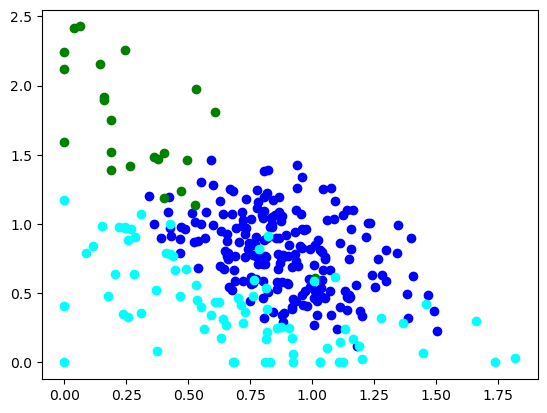

In [128]:
gmm_U_3 = apply_gmm(U, 3)
gmm_U_3.bic(U)


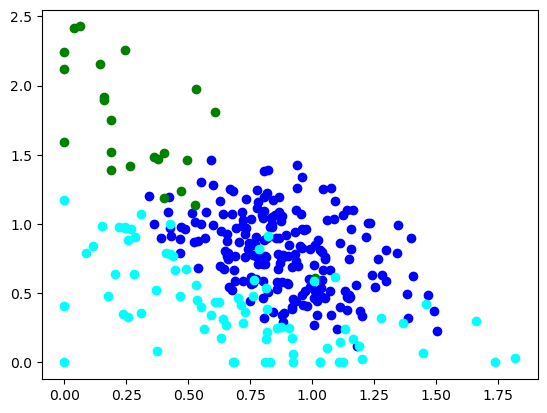

In [130]:
labels = gmm_U_3.predict(U)
frame = pd.DataFrame(U)
frame['cluster'] = labels
frame.columns = ['Dim_1', 'Dim_2', 'Dim_3', 'cluster']

color=['blue','green','cyan']
for k in range(0,3):
    data = frame[frame["cluster"]==k]
    plt.scatter(data["Dim_1"],data["Dim_2"],c=color[k])
plt.show()

In [123]:
gmm_U_2 = apply_gmm(U, 2)
gmm_U_2.bic(U)

-186.9431948828982

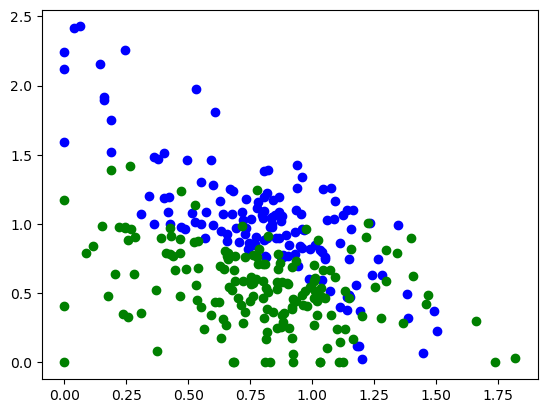

In [131]:
labels = gmm_U_2.predict(U)
frame = pd.DataFrame(U)
frame['cluster'] = labels
frame.columns = ['Dim_1', 'Dim_2', 'Dim_3', 'cluster']

color=['blue','green','cyan']
for k in range(0,3):
    data = frame[frame["cluster"]==k]
    plt.scatter(data["Dim_1"],data["Dim_2"],c=color[k])
plt.show()

In [124]:
gmm_U_4 = apply_gmm(U, 4)
gmm_U_4.bic(U)

-145.92435626329802

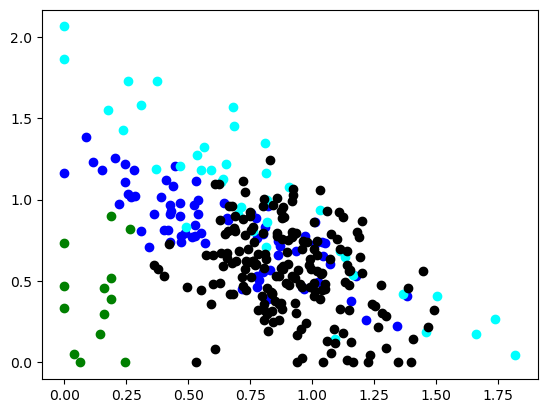

In [135]:
labels = gmm_U_4.predict(U)
frame = pd.DataFrame(U)
frame['cluster'] = labels
frame.columns = ['Dim_1', 'Dim_2', 'Dim_3', 'cluster']

color=['blue','green','cyan', 'black']
for k in range(0,4):
    data = frame[frame["cluster"]==k]
    plt.scatter(data["Dim_1"],data["Dim_3"],c=color[k])
plt.show()

In [110]:
gmm = apply_gmm(df_radiomic_interpolate_scaled_data, 3)

In [118]:
gmm_2 = apply_gmm(df_radiomic_interpolate_scaled_data, 2)
gmm_2.bic(df_radiomic_interpolate_scaled_data)

53531009.799970694

- I did NMF on radiomics data
- I plotted 3 clusters on 3 variantions of NMF
- I need to separate PD and Healthy
- Then I need to perform this again
- then I need to make sure the input radiomics were vectorized properly
- then I need to add the features salmanpour plotted in their paper and plot it again
- then I need to use the subtype info in predicting subtypes
- then predict clinical outcome - check markello for example

In [111]:
gmm

GaussianMixture(n_components=3, random_state=0)

In [117]:
gmm.bic(df_radiomic_interpolate_scaled_data)

86085157.53075047

In [116]:
df_radiomic_interpolate_scaled_data.shape

(310, 3376)

In [115]:
#predictions from gmm
labels = gmm.predict(df_radiomic_interpolate_scaled_data)
len(labels)

310

In [ ]:
frame = pd.DataFrame(df_radiomic_interpolate_scaled_data)
frame['cluster'] = labels
frame.columns = ['Weight', 'Height', 'cluster']

color=['blue','green','cyan', 'black']
for k in range(0,4):
    data = frame[frame["cluster"]==k]
    plt.scatter(data["Weight"],data["Height"],c=color[k])
plt.show()

- Now that I have GMM - cluster: what to do now?

In [94]:
import numpy as np
import pandas as pd
from sklearn.decomposition import NMF
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import MinMaxScaler

# Assuming you have a preprocessed DataFrame `df`
# `n_components` is the number of desired features in the reduced space
# `n_clusters` is the number of clusters for the GMM
# `random_state` ensures reproducibility

def apply_nmf(df, n_components, random_state=0, max_iter=200):
    nmf = NMF(n_components=n_components, random_state=random_state, max_iter = max_iter)
    U = nmf.fit_transform(df)  # The matrix U in the description
    V = nmf.components_        # The matrix V in the description
    return U, V, nmf

def adjust_latent_space(W, symptomatology_weights):
    # Assuming `symptomatology_weights` is a dictionary with symptom names as keys
    # and weights as values, for example:
    # symptomatology_weights = {'motor': 0.5, 'cognitive': 0.3, 'sleep': 0.2}
    adjusted_W = np.zeros_like(W)
    for i, symptom in enumerate(symptomatology_weights):
        adjusted_W[:, i] = W[:, i] * symptomatology_weights[symptom]
    return adjusted_W

def apply_gmm(data, n_clusters, random_state=0):
    gmm = GaussianMixture(n_components=n_clusters, random_state=random_state)
    gmm.fit(data)
    return gmm

# Example usage:
n_components = 3  # for NMF
n_clusters = 3    # for GMM
random_state = 42

# Apply NMF
W, H, nmf_model = apply_nmf(df, n_components, random_state)

# Adjust latent space
symptomatology_weights = {'motor': 0.5, 'cognitive': 0.3, 'sleep': 0.2}
adjusted_W = adjust_latent_space(W, symptomatology_weights)

# Normalize the adjusted matrix
scaler = MinMaxScaler()
normalized_adjusted_W = scaler.fit_transform(adjusted_W)

# Apply GMM to the normalized adjusted latent space
gmm_model = apply_gmm(normalized_adjusted_W, n_clusters, random_state)

# Assign clusters to the data points
cluster_labels = gmm_model.predict(normalized_adjusted_W)

# Add the cluster labels back to the original DataFrame (if desired)
df['cluster_label'] = cluster_labels

# Now df includes a 'cluster_label' column indicating the cluster each patient belongs to.


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind

def preprocess_radiomics_features(df, labels):
    # Assuming 'df' is your DataFrame with radiomics features
    # and 'labels' is a binary array or series indicating healthy (0) vs. patient (1)

    # Step 1: Directionality of features
    # Identify features where higher values are worse (assuming 0: healthy, 1: patient)
    worse_when_higher = []
    for column in df.columns:
        t_stat, p_value = ttest_ind(df[column][labels == 0], df[column][labels == 1], nan_policy='omit')
        if p_value < 0.05 and df[column][labels == 1].mean() > df[column][labels == 0].mean():
            worse_when_higher.append(column)

    # Flip the directionality of the features if necessary
    for column in worse_when_higher:
        df[column] = df[column].max() - df[column] + df[column].min()

    # Step 2: Clipping extreme values to the 2nd and 98th percentiles
    for column in df.columns:
        lower_bound = df[column].quantile(0.02)
        upper_bound = df[column].quantile(0.98)
        df[column] = np.clip(df[column], lower_bound, upper_bound)

    # Step 3: Handle missing data by interpolating
    df = df.interpolate(method='linear', limit_direction='forward', axis=0)
    
    # Step 4: Vectorize dataset
    # Flattening the DataFrame for vectorization is already inherent in the DataFrame structure,
    # so if df is already in the correct wide-form format, you might not need to do anything here.

    # Step 5: Min-max normalization across all features
    df = (df - df.min()) / (df.max() - df.min())

    return df

# Sample usage:
# df_radiomics is your DataFrame with radiomics features
# labels is a binary array or series indicating healthy (0) vs. patient (1)
# processed_df = preprocess_radiomics_features(df_radiomics, labels)


In [ ]:
def flipping_data(data, ECAT, files_of_interest, visit_id='BL', fil=0, remove_outlier=False):
#     print(f'flipping_data data head = {data}')
    copy_data = copy.deepcopy(data)
    test_df = {i: {} for i in files_of_interest}
#     print(f'files_of_interest = {files_of_interest}')
    for feat in files_of_interest:
#         print(f'feat = {feat}')
#         c = 0
        KP = data[feat].set_index(['PATNO'])
        DF = pd.merge(KP, ECAT, left_index=True, right_index=True)
        DF2 = DF[DF['EVENT_ID']==visit_id]
        DF2 = DF2.reset_index().set_index(['PATNO', 'EVENT_ID'])
#         print(f'DF2 = {DF2}')

        for col in list(DF2.columns):
#             print(f'col = {col}')
            if col in ['ENROLL_CAT', 'INFODT', 'DYSKIRAT']:
                continue

            l_hc = list(DF2[DF2['ENROLL_CAT'] == 'HC'][col].dropna())
            l_pd = list(DF2[DF2['ENROLL_CAT'] == 'PD'][col].dropna())

            temp = np.array(data[feat][col].dropna())

            if fil == 0:
                decision, m_hc, m_pd, p_val, ci = test_measure(l_hc, l_pd, 0.05)
                decision = 'FAIL'
            else:
                decision, m_hc, m_pd, p_val, ci = test_measure(l_hc, l_pd, 0.05)

            if decision == 'PASS':# or feat in ['hopkins_verbal', 'moca']:
                test_df[feat][col] = str(np.round(p_val, 3)) + '**' + ' ' + ci
#                 print('in if decision = PASS feat = {feat} col = {col}')
            else:
                test_df[feat][col] = str(np.round(p_val, 3)) + ' ' + ci
#                 print('in if decision = FAIL feat = {feat} col = {col}')
    test_df_df = defaultdict(list)

#     print(f'test_df.head = {test_df}')

    for i, j in test_df.items():
            c = 1
            for k, m in j.items():
                test_df_df['attribute'].append(k)
                test_df_df['p value'].append(m)
                if c > 0:
                    test_df_df['feature'].append('')
                else:
                    test_df_df['feature'].append(i)

#     print(f'test_df_df.head = {test_df_df}')
    P = pd.DataFrame(test_df_df)
    P = P.sort_values(by=['p value', 'feature']).set_index(pd.Index(range(len(P))))
    P['reverse'] = P['p value'].map(lambda x: '**' in x)
    # import pdb; pdb.set_trace()
    return copy_data, P

In [50]:
def convert_flat_to_multiindex(df):
    df_converted = df.pivot(index='PATNO', columns='Visits')
    
    return df_converted

In [3]:
def merge_dataframes(df_main, df_to_add):
    # Pivot df_to_add to create a multi-level column structure matching df_main
    df_to_add_pivoted = df_to_add.pivot(index='PATNO', columns='Visits')
    print('df_to_add_pivoted \n', df_to_add_pivoted)

    # Join the pivoted df_to_add to the df_main
    df_merged = df_main.join(df_to_add_pivoted, on='PATNO', how='left')
    
    return df_merged

In [4]:
# The actual function call would look like this (commented out per instructions):
merged_df = merge_dataframes(df_main, df_to_add)
merged_df

NameError: name 'df_main' is not defined

In [1]:
merged_df

NameError: name 'merged_df' is not defined

In [25]:
def convert_to_flat_structure(df_main):
    # Reset index to make 'PATNO' a column
    df_reset = df_main.reset_index()
    
    # Melt the DataFrame to convert MultiIndex columns to rows
    df_melted = df_reset.melt(id_vars='PATNO', var_name=['Measurement', 'Visit'], value_name='Value')
    
    # Pivot the melted DataFrame to get 'Visits' as columns and 'Measurement' as part of the rows
    df_pivoted = df_melted.pivot_table(index=['PATNO', 'Visit'], columns='Measurement', values='Value').reset_index()
    
    # Rename columns to match the structure of df_to_add if necessary
    df_pivoted.columns.name = None  # Remove the name of the columns index
    
    return df_pivoted

# Assuming df_main is defined as per the example given
df_main_example = pd.DataFrame(
    data={
        ('CN2RSP', 'BL'): {3000: 0.0, 3001: 0.4},
        ('CN2RSP', 'V04'): {3000: 0.1, 3001: 0.5},
        ('CN34RSP', 'BL'): {3000: 0.2, 3001: 0.6},
        ('CN34RSP', 'V04'): {3000: 0.3, 3001: 0.7}
    },
    index=pd.Index([3000, 3001], name='PATNO')
)

print('df_main_example \n', df_main_example)
df_main_example.columns = pd.MultiIndex.from_tuples(df_main_example.columns, names=['Measurement', 'Visit'])

# Convert df_main to a structure like df_to_add
df_converted = convert_to_flat_structure(df_main_example)

# Note: This code is prepared based on the structure provided and should be executed in an environment where pandas is available.
# The final DataFrame, df_converted, will have a flat structure similar to the desired df_to_add format.


df_main_example 
       CN2RSP      CN34RSP     
          BL  V04      BL  V04
PATNO                         
3000     0.0  0.1     0.2  0.3
3001     0.4  0.5     0.6  0.7


In [24]:
df_converted

,PATNO,Visit,CN2RSP,CN34RSP
0,3000,BL,0.0,0.2
1,3000,V04,0.1,0.3
2,3001,BL,0.4,0.6
3,3001,V04,0.5,0.7
